# What factors affect the cancelation rate ?

Hypothesis: 
- The cancelation occures more when the price is higher
- The cancelation occures more when the lead time is less
- Deposit type affect the cancelation rate ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('hotel_booking.csv')

# Data info and cleaning 

In [3]:
df.shape

(119390, 36)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


Find and solve null and duplicated values

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['agent','company'],axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Find and solve outliers

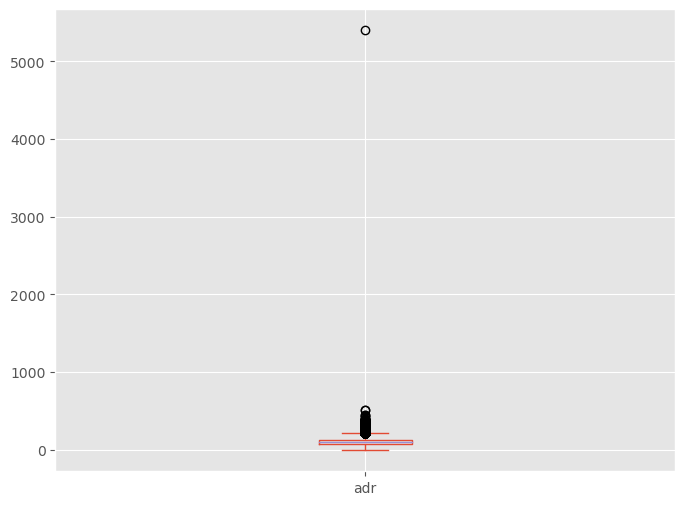

In [15]:
df['adr'].plot(kind='box',figsize=(8,6))
plt.show()

In [16]:
df = df[df['adr']<5400]

# Data analysis and Visualization

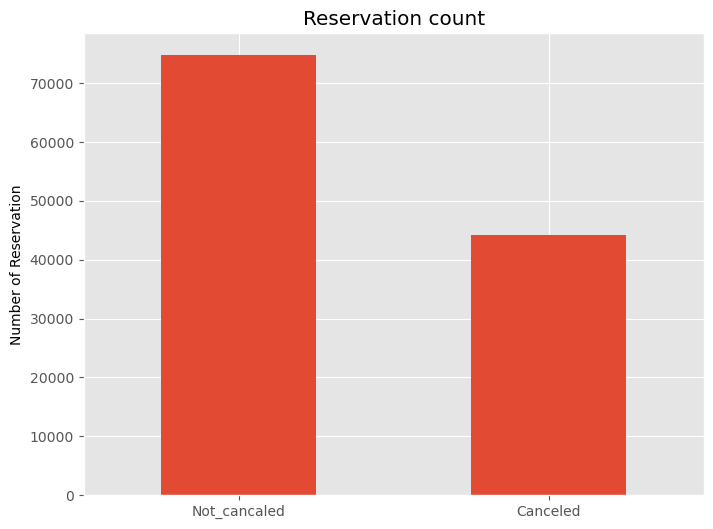

In [17]:
df['is_canceled'].value_counts().plot(kind='bar',figsize=(8,6),rot=0)
plt.title('Reservation count')
plt.ylabel('Number of Reservation')
plt.xticks([0,1],['Not_cancaled','Canceled'])

plt.show()

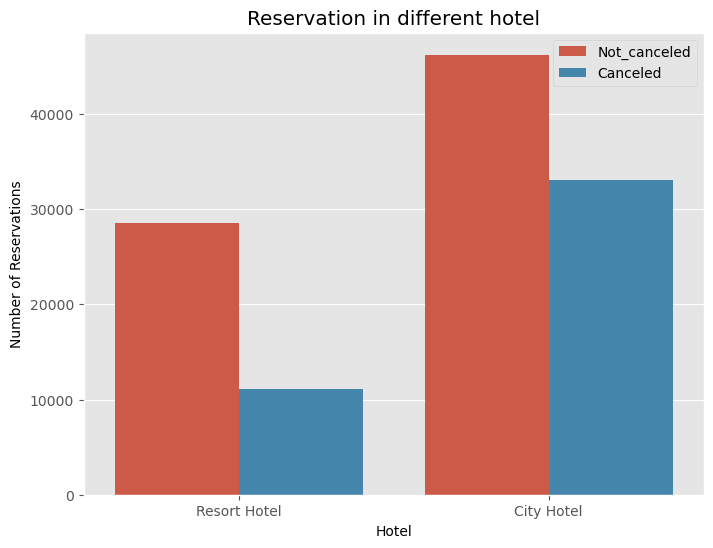

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title('Reservation in different hotel')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not_canceled','Canceled'])
plt.show()

In [19]:
city_hotel = df[df['hotel']=='City Hotel']
resort_hotel = df[df['hotel']=='Resort Hotel']

In [20]:
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()

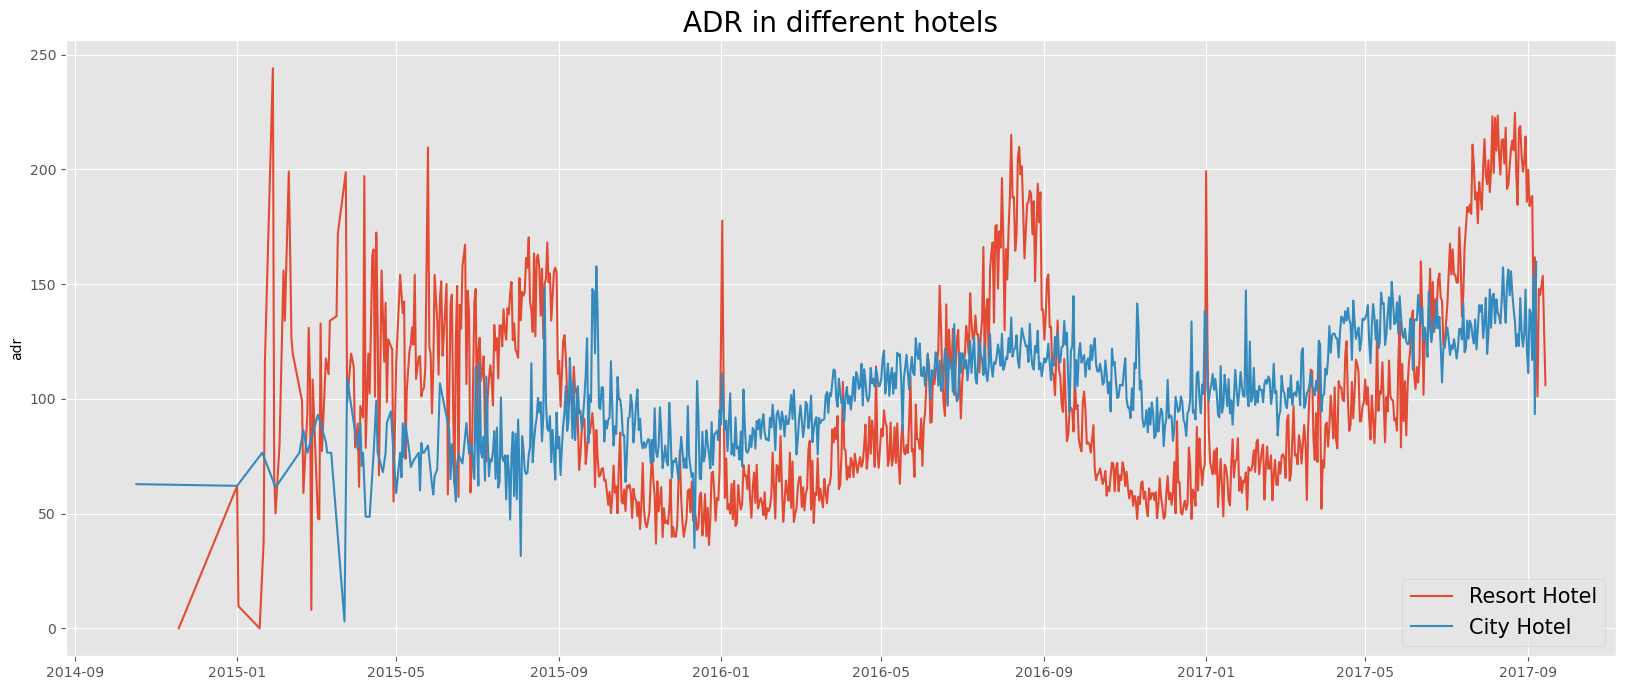

In [21]:
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.title('ADR in different hotels',fontsize=20)
plt.ylabel('adr')
plt.legend(fontsize=15)

plt.show()

In [22]:
canceled_data = df[df['is_canceled'] == 1]
canceled_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
canceled_adr.sort_values('reservation_status_date',inplace=True)

notcanceled_data = df[df['is_canceled'] == 0]
notcanceled_adr = notcanceled_data.groupby('reservation_status_date')['adr'].mean().reset_index()
notcanceled_adr.sort_values('reservation_status_date',inplace=True)

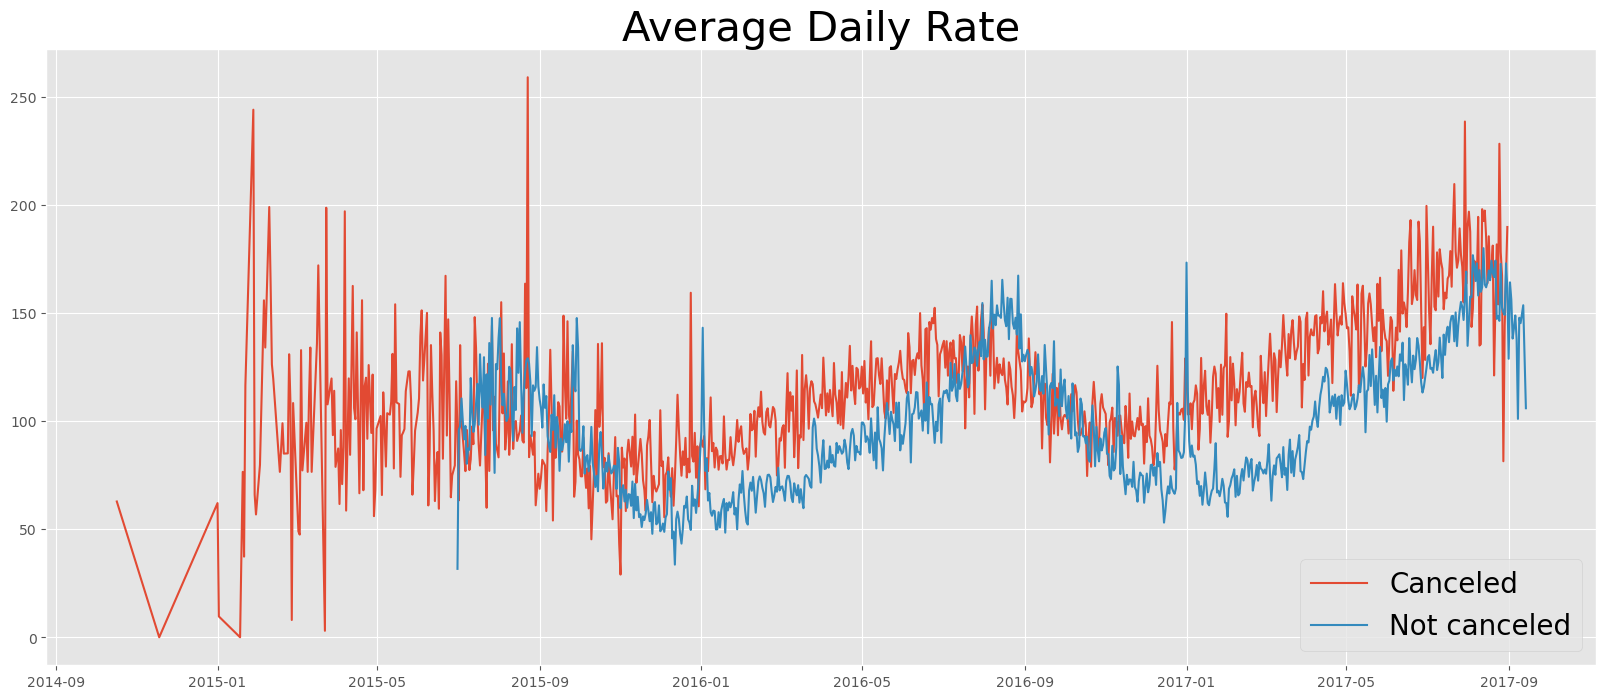

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(canceled_adr['reservation_status_date'],canceled_adr['adr'],label='Canceled')
plt.plot(notcanceled_adr['reservation_status_date'],notcanceled_adr['adr'],label='Not canceled')
plt.title('Average Daily Rate',fontsize=30)
plt.legend(['Canceled','Not canceled'], fontsize=20)

plt.show()

In [32]:
df['month'] = df['reservation_status_date'].dt.month 

How lead time affect the reservation rate ?

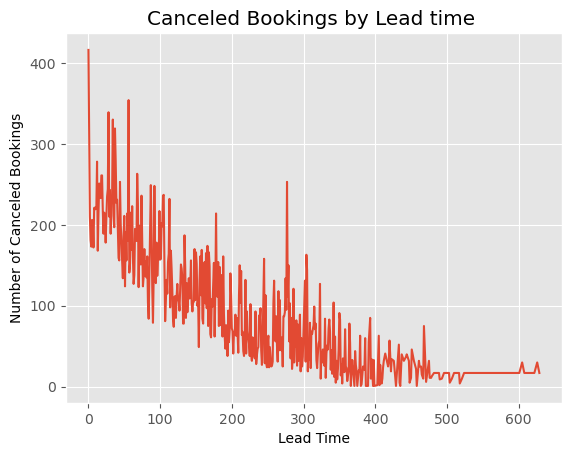

In [25]:
canceled_counts = canceled_data['lead_time'].value_counts().sort_index()
plt.plot(canceled_counts.index.values, canceled_counts.values)
plt.xlabel('Lead Time')
plt.ylabel('Number of Canceled Bookings')
plt.title('Canceled Bookings by Lead time ')
plt.show()

In [26]:
#Thoi gian dat phong cang xa thi ty le huy phong cang cao 

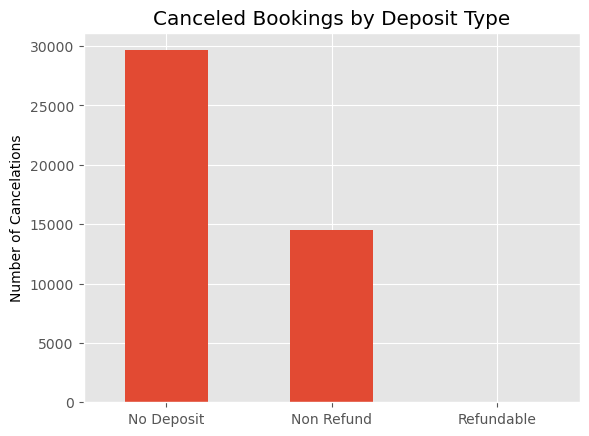

In [28]:
canceled_data['deposit_type'].value_counts().plot(kind='bar',rot=0)
plt.ylabel('Number of Cancelations')
plt.title('Canceled Bookings by Deposit Type')
plt.show()

In [29]:
canceled_data['deposit_type'].value_counts(normalize=True)

No Deposit    0.671249
Non Refund    0.327935
Refundable    0.000815
Name: deposit_type, dtype: float64

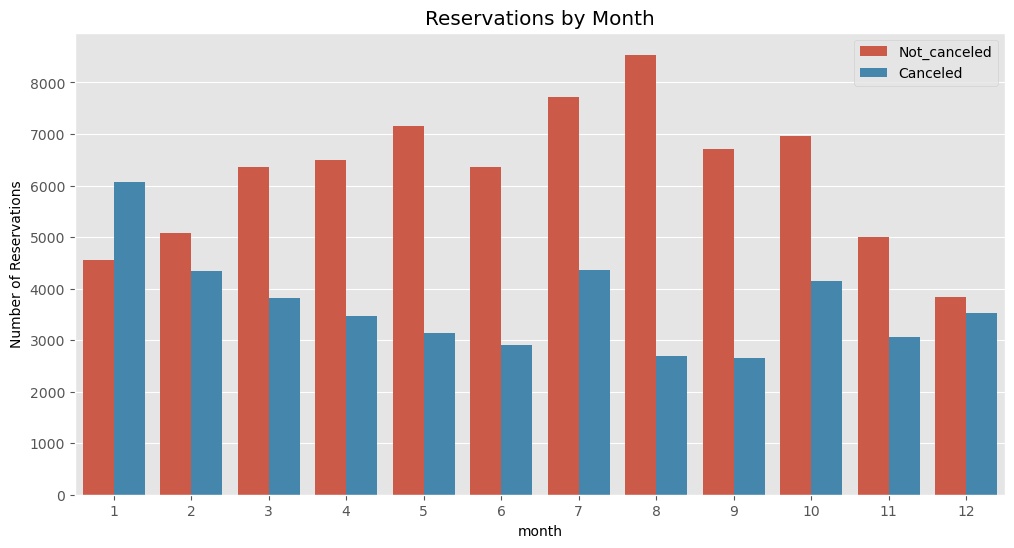

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.ylabel('Number of Reservations')
plt.title('Reservations by Month')
plt.legend(['Not_canceled','Canceled'])
plt.show()